# Running the Netherlands on solar energy
How much land would it take to run the Netherlands on solar energy? 

In order to answer this question, we need to know how much energy the Netherlands consumes per year, and how much energy can be produced in the Netherlands per square kilometer. We will keep energy production pretty simple - according to the CBS (central bureau of statistics) of the Netherlands, [the total energy consumption in the country amounted to 3157 PJ in 2017](https://longreads.cbs.nl/trends18-eng/economy/figures/energy/). **That's about 877 billion kwh per year.** For the sake of simplicity, we will just use this number. 

Energy production will be more complex. We need to know how much sunlight the Netherlands receives per year, and how much of this sunlight can be converted into energy using solar panels. With this information, we can estimate how much land will be required to power the country using solar panels. 

useful links: 
* our world in data on renewable energy: https://ourworldindata.org/renewable-energy

In [2]:
import rasterio as rs
import numpy as np
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import math

## How much sunlight does the Netherlands receive per year?
* Solar irradiance: https://en.wikipedia.org/wiki/Solar_irradiance
* Solar resource maps: https://solargis.com/maps-and-gis-data/download/netherlands
* Global solar atlas: https://globalsolaratlas.info/download/netherlands

GTI = Longterm yearly average of global irradiation at optimum tilt (GTI) in kWh/m2, covering the period 1994-2018

In [3]:
pc2 = gpd.read_file('data/nl_pc2_amersfoort.shp')
pc4 = gpd.read_file('data/nl_pc4_amersfoort.shp')

In [4]:
gdf = gpd.read_file('data/nl_solarAtlas/solarPotential_cropped.shp')
gdf = gdf.sort_values(by='kwhPerYear', ascending=False).reset_index(drop=True)
gdf.head()

,gti,kwhPerYear,geometry
0,1343.806030,9.739325e+08,"POLYGON ((27807.084 394603.815, 27807.084 3924..."
1,1341.575317,9.723158e+08,"POLYGON ((30006.278 394603.815, 30006.278 3924..."
2,1340.241089,9.713488e+08,"POLYGON ((25607.889 394603.815, 25607.889 3924..."
3,1338.161255,9.698415e+08,"POLYGON ((27807.084 396800.852, 27807.084 3946..."
4,1338.121948,9.698130e+08,"POLYGON ((30006.278 396800.852, 30006.278 3946..."


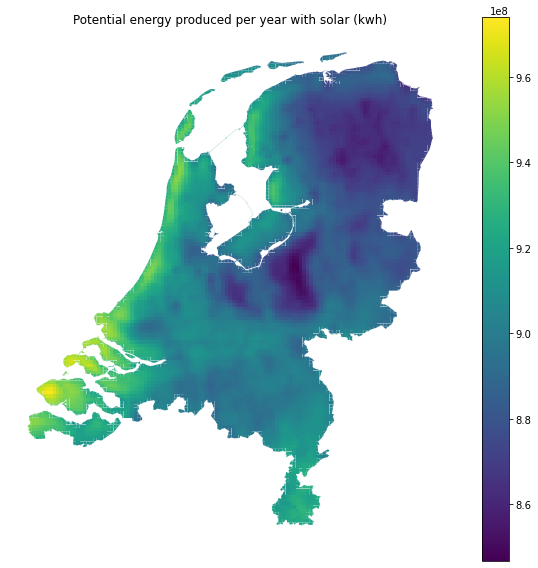

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(column='kwhPerYear', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Potential energy produced per year with solar (kwh)')
plt.show() 

In [6]:
totalEnergyConsumptionNl = 876944444444
kwhTot = 0
for i, row in gdf.iterrows(): 
    kwh = row.kwhPerYear
    kwhTot += kwh
    if kwhTot >= totalEnergyConsumptionNl: 
        break

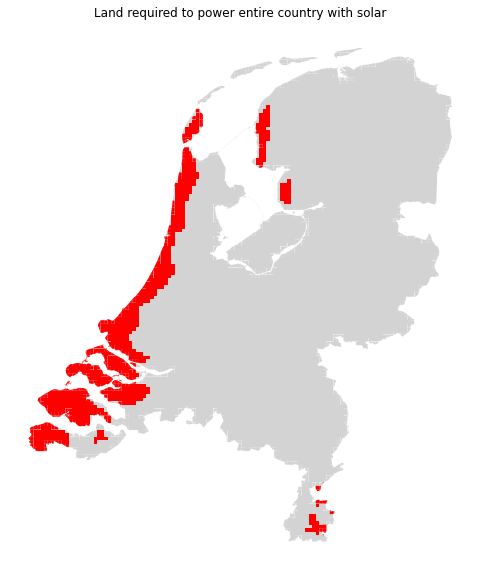

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(color='lightgrey', ax=ax)
gdf[:i].plot(ax=ax, color='red')
ax.axis('off')
ax.set_title('Land required to power entire country with solar')
plt.show()

In [9]:
perc = round(len(gdf[:i]) / len(gdf) * 100)
print('amount of land required for solar: {}%'.format(perc))

amount of land required for solar: 12%


In [8]:
%%time
# read file 
landuse = gpd.read_file('data/landuse_amersfoort.shp')

# simplify geometry 
def simpGeom(x): 
    thresh = math.sqrt(x.area) / 10
    x_simp = x.simplify(thresh, preserve_topology=False)
    return x_simp
landuse['geomSimp'] = landuse.geometry.map(lambda x: simpGeom(x))

# define bounds for nl
maxx_nl = pc2.bounds.max().maxx
maxy_nl = pc2.bounds.max().maxy
minx_nl = pc2.bounds.min().minx
miny_nl = pc2.bounds.min().miny

def outOfBounds(x, maxx_nl, maxy_nl, minx_nl, miny_nl):     
    minx, miny, maxx, maxy = x.bounds
    if maxx > maxx_nl or maxy > maxy_nl or minx < minx_nl or miny < miny_nl: 
        inNl = False 
    else: 
        inNl = True
    return inNl

landuse['inNl'] = landuse.geometry.map(lambda x: outOfBounds(x, maxx_nl, maxy_nl, minx_nl, miny_nl))
landuse = landuse[landuse.inNl == True]

KeyboardInterrupt: 

In [2]:
landuse.drop(columns=['geometry'])

NameError: name 'landuse' is not defined

In [ ]:
landuse.drop(columns=['geometry'])
landuse.rename(columns={'geomSimp': 'geometry'}, inplace=True)
landuse.head()

In [204]:
landuse.to_file('data/landuse_amersfort_shp')

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x000001F7DA950FD0>' as a data type

KeyboardInterrupt: 

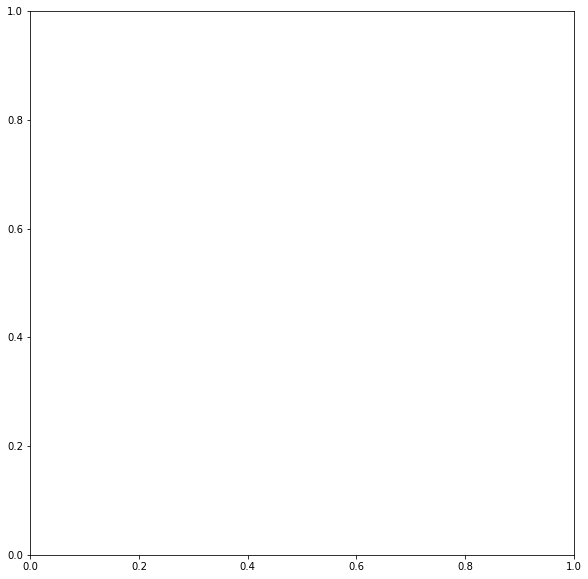

In [203]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
landuse.plot(ax=ax)
pc2.plot(ax=ax, color='red')
plt.show()

In [155]:
landForSolar_min_list = ['grass', 'heath', 'scrub', 'meadow']
landForSolar_max_list = ['allotments', 'grass', 'cemetery', 'industrial', 'heath',
                    'military', 'farmland', 'scrub', 'meadow', 'farmyard', 'vineyard', 'orchard']

landForSolar_min = landuse[landuse.fclass.isin(landForSolar_min_list)]
landForSolar_max = landuse[landuse.fclass.isin(landForSolar_max_list)]

In [187]:
728 * 50 / 1000

36.4

In [181]:
x = landuse.loc[0, 'geometry']
minx, miny, maxx, maxy = x.bounds
maxx

136872.6953275525

In [177]:
maxy

615045.3397637472

In [178]:
landForSolar_max.bounds.max().maxy

841336.9011058754

In [171]:
landuse.head()

,osm_id,code,fclass,name,geometry,geomSimp
0,3217163,7202,park,Abraham Dolehof,"POLYGON ((136832.837 455579.918, 136861.480 45...","POLYGON ((136832.837 455579.918, 136861.480 45..."
1,3243982,7202,park,None,"POLYGON ((136687.733 455485.667, 136706.934 45...","POLYGON ((136687.733 455485.667, 136706.934 45..."
2,4002474,7202,park,Molenpark,"POLYGON ((135211.862 455716.128, 135269.040 45...","POLYGON ((135211.862 455716.128, 135265.960 45..."
3,4100649,7210,nature_reserve,None,"POLYGON ((370540.416 679258.050, 370533.764 67...","POLYGON ((370540.416 679258.050, 370798.903 68..."
4,4233384,7202,park,Jochem Uytdehaageplantsoen,"POLYGON ((134428.142 455134.332, 134443.588 45...","POLYGON ((134428.142 455134.332, 134492.957 45..."


Wall time: 3min 3s


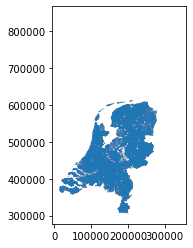

In [168]:
%%time
landForSolar_max.geometry.plot()

Wall time: 3min 15s


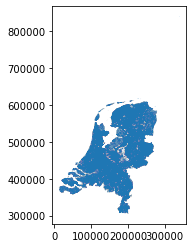

In [169]:
%%time
landForSolar_max.geomSimp.plot()